In [5]:
import matplotlib.pyplot as plt

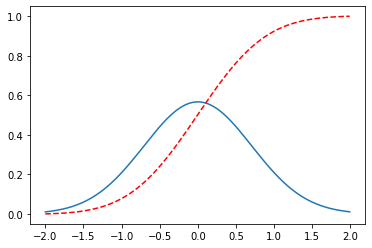

In [6]:
import numpy as np

# Create some test data
dx = 0.01
x  = np.arange(-2, 2, dx)
y  = np.exp(-x ** 2)

# Normalize the data to a proper PDF
y /= (dx * y).sum()

# Compute the CDF
Cy = np.cumsum(y * dx)

# Plot both
plt.plot(x, y)
plt.plot(x, Cy, 'r--')

In [7]:
# https://towardsdatascience.com/monte-carlo-simulation-a-practical-guide-85da45597f0e

- numpy.random.normal — the Normal Distribution
- numpy.random.triangular — a triangular distribution
- numpy.random.uniform — a uniform distribution
- numpy.random.weibull — a Weibull distribution

In [8]:
import numpy as np

## Uniform

In [9]:
def mc_uniform(min, max, samples):
    "Sampling from the Normal Distribution)"
    results = []
    for i in range(samples):
        results.append(np.random.uniform(min, max))
    return np.array(results)

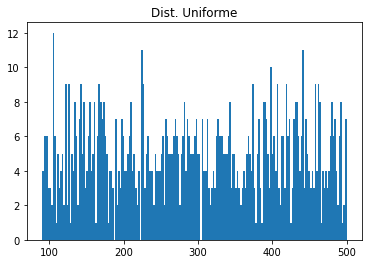

In [10]:
# import the required libraries 
import matplotlib.pyplot as plt 
# store the random numbers in a list 
min = 500
max = 90
samples = 1000

nums = mc_uniform(min, max, samples)
#nums /= nums.sum()

# # plotting a graph 
plt.title('Dist. Uniforme')
plt.hist(nums, bins=200);

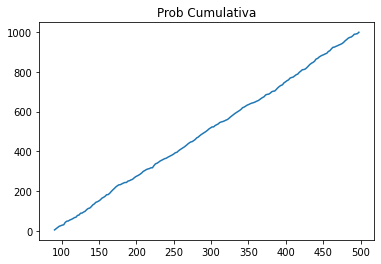

In [11]:
plt.title('Prob Cumulativa')
hist, bins = np.histogram(nums, bins=200)
plt.plot( bins[:-1], np.cumsum(hist))

## Normal Distribution

In [12]:
def mc_normal(mean, std_dev, samples):
    "Sampling from the Normal Distribution)"
    results = []
    for i in range(samples):
        results.append(np.random.normal(mean, std_dev))
    return np.array(results)

il min è: 230
il max è: 770


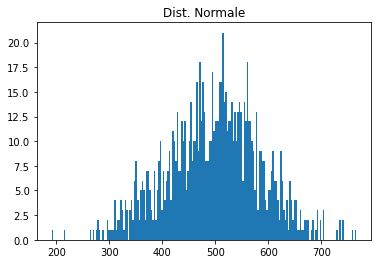

In [13]:
# import the required libraries 
import matplotlib.pyplot as plt 
# store the random numbers in a list 
samples = 1000
mean = 500
std_dev = 90

nums = mc_normal(mean, std_dev, samples)
        
# # plotting a graph 
plt.title('Dist. Normale')
plt.hist(nums, bins = 200);

min = mean-3*std_dev
max = mean+3*std_dev

print(f"il min è: {min}")
print(f"il max è: {max}")

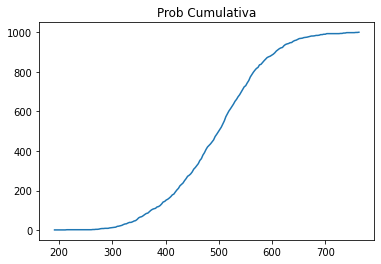

In [14]:
plt.title('Prob Cumulativa')
hist, bins = np.histogram(nums, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

## Triangular

In [15]:
def mc_triangle(min, mode, max, samples):
    results = []
    for _ in range(samples):
        results.append(np.random.triangular(min, mode, max))
    return np.array(results)

il min è: 20
la moda è: 32
il max è: 36


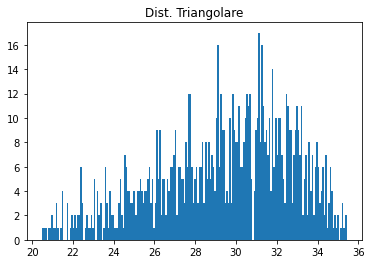

In [16]:
# import the required libraries 
import matplotlib.pyplot as plt 
# store the random numbers in a list 
samples = 1000
min = 20 
max = 36
mode = 32

nums = mc_triangle(min, mode, max, samples)

# # plotting a graph 
plt.title('Dist. Triangolare')
plt.hist(nums, bins = 200);

print(f"il min è: {min}")
print(f"la moda è: {mode}")
print(f"il max è: {max}")

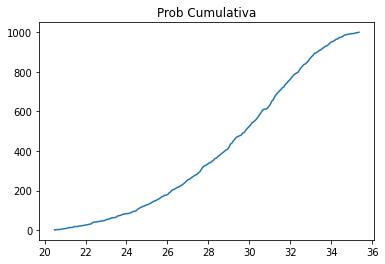

In [17]:
plt.title('Prob Cumulativa')
hist, bins = np.histogram(nums, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

In [18]:
# configuration
n = 10000 # number of samples
upper_limit = 33 # upper limit from specification

# components
component_1 = mc_normal(5,1,n)
component_2 = mc_normal(10,1,n)
component_3 = mc_normal(15,1,n)

# relationships
total = component_1 + component_2 + component_3

# success conditions
probability = np.sum(total > upper_limit)/len(total)*100
print("Probability of exceeding the time limit: ", round(probability, 3), "%")

Probability of exceeding the time limit:  4.24 %


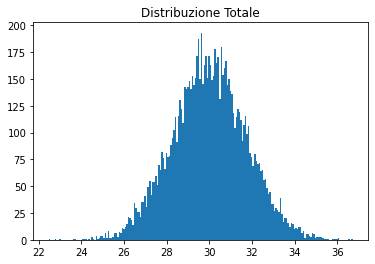

In [19]:
# # plotting a graph 
plt.title('Distribuzione Totale')
plt.hist(total, bins = 200);

In [20]:
# import scipy

# def fit_and_plot(dist,data):
#     params = dist.fit(data)
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]
#     x = np.linspace(0, len(data), len(data))
#     _, ax = plt.subplots(1, 1)
#     plt.hist(data, bins = 80, range=(0, len(data)))
#     ax2 = ax.twinx()
#     ax2.plot(x, dist.pdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2)
#     plt.show()
#     return dist, loc, scale, arg

# fit_and_plot(scipy.stats.norm,total);

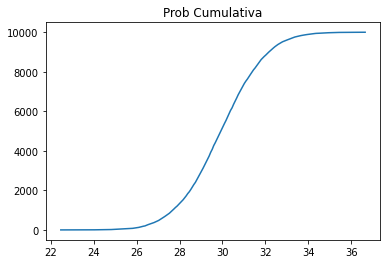

In [21]:
plt.title('Prob Cumulativa')
hist, bins = np.histogram(total, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

In [22]:
# configuration
n = 1000 # number of samples
limit = 0 # limit from specification
# components
component_1 = mc_triangle(3.8, 4.0, 4.4,n)
component_2 = mc_triangle(5.9, 6.0, 6.5,n)
component_3 = mc_triangle(5.8, 6.0, 6.1,n)
component_4 = mc_uniform(16.4, 16.6, n)
# relationships
total = component_4 - component_1 - component_2 - component_3
# success conditions
probability = np.sum(total < limit)/len(total)*100
print("Probability of not fitting the blocks: ", round(probability, 4), "%")

Probability of not fitting the blocks:  4.7 %


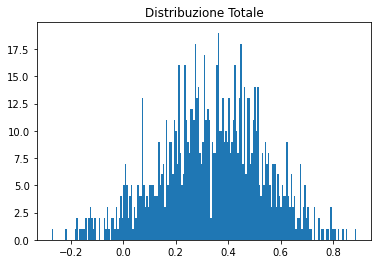

In [23]:
# # plotting a graph 
plt.title('Distribuzione Totale')
plt.hist(total, bins = 200);

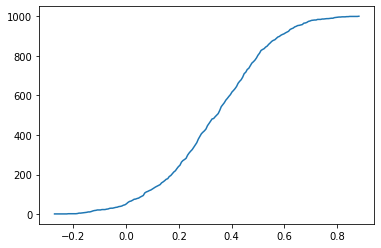

In [24]:
hist, bins = np.histogram(total, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

## Deli Dani

In [25]:
fixedCosts = 374000
costOfCapital = 0.15
investment = 120000

coffeePrice = 1
coffeeCM = 0.82
breakfastPrice = 2.2
breakfastCM = 0.80
snackPrice = 3.5
snackCM = 0.65
beveragePrice = 2
beverageCM = 0.70

In [26]:
# coffee(500,90)
# breakfasts(200,36)
# snacks(120,22)
# beverages(180,32)

In [27]:
n=5000
coffees = mc_normal(500,90,n)
breakfasts = mc_normal(200,36,n)
snacks = mc_normal(120,22,n)
beverages = mc_normal(180,32,n)

dailyTickets = coffees + breakfasts + snacks + beverages
dailyRevenue = coffees * coffeePrice + breakfasts * breakfastPrice + snacks * snackPrice + beverages * beveragePrice
dailyIncome  = coffees * coffeePrice * coffeeCM + breakfasts * breakfastPrice * breakfastCM + snacks * snackPrice * snackCM + beverages * beveragePrice * beverageCM

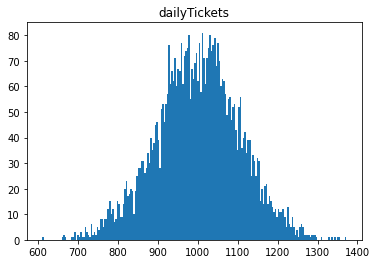

In [28]:
## plotting a graph 
plt.title('dailyTickets')
plt.hist(dailyTickets, bins = 200);

In [69]:
def hist(data, bins, title, labels, range = None):
  fig = plt.figure(figsize=(15, 8))
  ax = plt.axes()
  plt.ylabel("Proportion")
  values, base, _ = plt.hist( data  , bins = bins, alpha = 0.5, color = "green", range = range, label = "Simulation")
  ax_bis = ax.twinx()
  values = np.append(values,0)
  ax_bis.plot( base, np.cumsum(values)/ np.cumsum(values)[-1], color='darkorange', marker='o', linestyle='-', markersize = 1, label = "Cumulative Probability" )
  plt.xlabel(labels)
  plt.ylabel("Probability")
  
  plt.axvline(data.mean(), color='k', linestyle='dashed', linewidth=1)
  min_ylim, max_ylim = plt.ylim()
  plt.text(data.mean()*1.1, max_ylim*0.01, 'Mean: {:.2f}'.format(data.mean()))

  plt.title(title)
  ax_bis.legend();
  ax.legend();
  plt.show()
  return

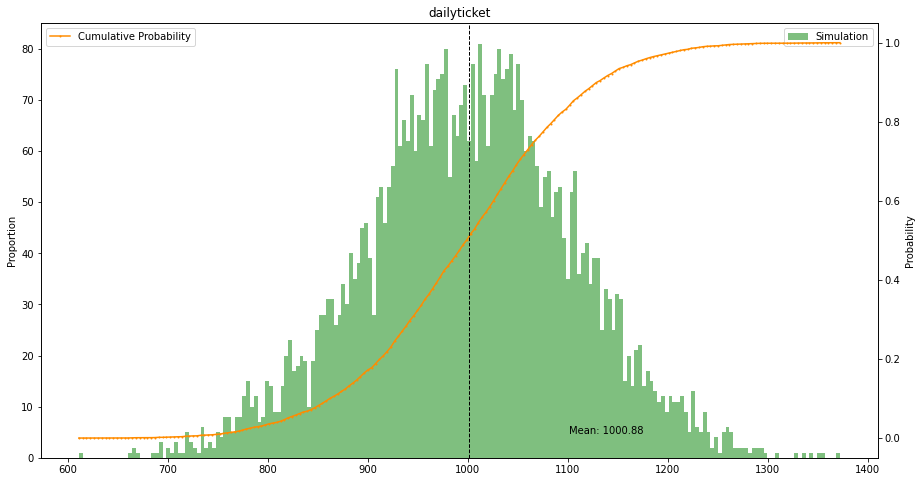

In [71]:
hist(dailyTickets,200,'dailyticket','labels')

In [61]:
cumulative = np.cumsum(dailyTickets)/ np.cumsum(dailyTickets)[-1]
cumulative

array([2.42035399e-04, 4.46170125e-04, 6.42235004e-04, ...,
       9.99554911e-01, 9.99750184e-01, 1.00000000e+00])

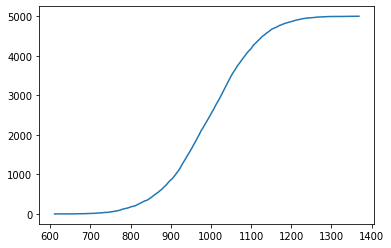

In [68]:
hist, bins = np.histogram(dailyTickets, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

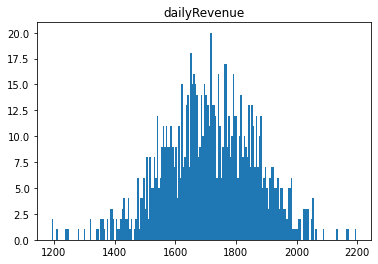

In [ ]:
## plotting a graph 
plt.title('dailyRevenue')
plt.hist(dailyRevenue, bins = 200);

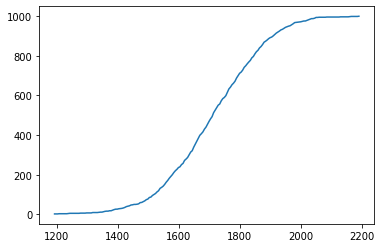

In [ ]:
hist, bins = np.histogram(dailyRevenue, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

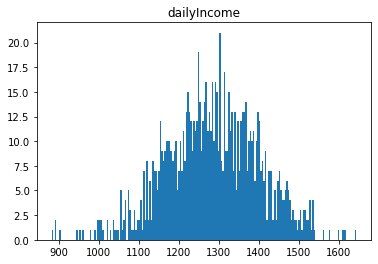

In [ ]:
## plotting a graph 
plt.title('dailyIncome')
plt.hist(dailyIncome, bins = 200);

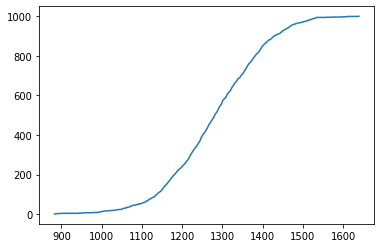

In [ ]:
hist, bins = np.histogram(dailyIncome, bins=200)
plt.plot( bins[:-1], np.cumsum(hist));

In [ ]:
days = 310

totalTickets = dailyTickets * days
totalRevenues = dailyRevenue * days
totalOperatingIncome = dailyIncome * days

In [ ]:
totalTickets

array([305706.27337582, 310885.93299243, 325722.27287291, ...,
       301695.09037898, 283262.49045976, 277559.57449972])

# Deli case

_INPUT_

**Cost of capital: 15%**

**Investment: 120,000 €**

**Average profile tickets**
* Coffees: 50 units, 1.00 € price, 82% contribution margin
* Breakfasts: 20 units, 2.20 € price, 80% contribution margin
* Snacks: 12 units, 3.50 € price, 65% contribution margin
* Beverages: 18 units, 2.00 € price, 70% contribution margin
* Total: 100 units, 1.72 € average price, 75% average contribution margin

**Medium shopping centre**
Average daily tickets: 494 (min 407, max 581)
Fixed costs structure: 286,000 €

**Big shopping centre**
Average daily tickets: 1017 (min 872, max 1163)
Fixed costs structure: 374,000 €


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fixedCosts = 374000
costOfCapital = 0.15
investment = 120000

coffeePrice = 1
coffeeCM = 0.82
breakfastPrice = 2.2
breakfastCM = 0.80
snackPrice = 3.5
snackCM = 0.65
beveragePrice = 2
beverageCM = 0.70

def dailyCoffees():
  return random.normalvariate(500,90)

def dailyBreakfasts():
  return random.normalvariate(200,36)

def dailySnacks():
  return random.normalvariate(120,22)

def dailyBeverages():
  return random.normalvariate(180,32)

In [ ]:
RANDOM_STATE = 667
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
dataset = sns.load_dataset('titanic')
# I want only the age column, but I don't want to deal with missing values
ages = dataset.age.dropna() #series

In [ ]:
def fit_and_plot(dist,data):
    params = dist.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = np.linspace(0, 80, 80)
    _, ax = plt.subplots(1, 1)
    plt.hist(data, bins = 80, range=(0, 80))
    ax2 = ax.twinx()
    ax2.plot(x, dist.pdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2)
    plt.show()
    return dist, loc, scale, arg

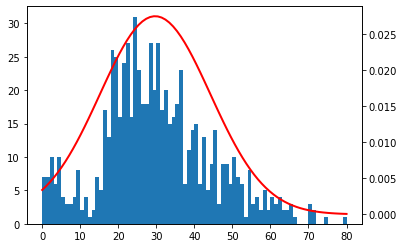

In [ ]:
fit_and_plot(scipy.stats.norm,ages);

il min è: 230
il max è: 770


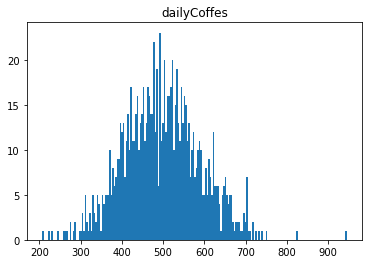

In [ ]:
from pandas.core.common import random_state
# import the required libraries 
import random 
import matplotlib.pyplot as plt 
    
# store the random numbers in a list 
nums = [] 
mu = 500
sigma = 90
    
for i in range(1000): 
    values = random.normalvariate(mu, sigma) 
    nums.append(values) 
        
# # plotting a graph 
plt.title('dailyCoffes')
plt.hist(nums, bins = 200);

min = mu-3*sigma
max = mu+3*sigma

print(f"il min è: {min}")
print(f"il max è: {max}")

il min è: 92
il max è: 308


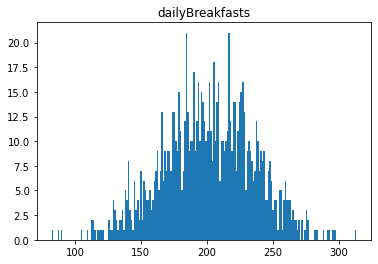

In [ ]:
# import the required libraries 
import random 
import matplotlib.pyplot as plt 
    
# store the random numbers in a list 
nums = [] 
mu = 200
sigma = 36
    
for i in range(1000): 
    values = random.normalvariate(mu, sigma) 
    nums.append(values) 
        
# # plotting a graph 
plt.title('dailyBreakfasts')
plt.hist(nums, bins = 200);

min = mu-3*sigma
max = mu+3*sigma

print(f"il min è: {min}")
print(f"il max è: {max}")

il min è: 54
il max è: 186


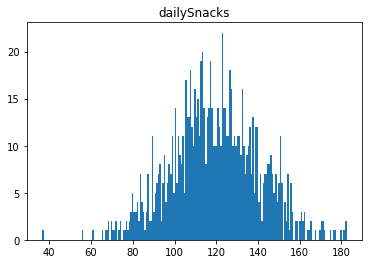

In [ ]:
# import the required libraries 
import random 
import matplotlib.pyplot as plt 
    
# store the random numbers in a list 
nums = [] 
mu = 120
sigma = 22
    
for i in range(1000): 
    values = random.normalvariate(mu, sigma) 
    nums.append(values) 
        
# # plotting a graph 
plt.title('dailySnacks')
plt.hist(nums, bins = 200);

min = mu-3*sigma
max = mu+3*sigma

print(f"il min è: {min}")
print(f"il max è: {max}")

il min è: 114
il max è: 246


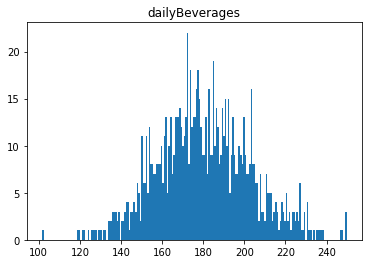

In [ ]:
# import the required libraries 
import random 
import matplotlib.pyplot as plt 
    
# store the random numbers in a list 
nums = [] 
mu = 180
sigma = 22
    
for i in range(1000): 
    values = random.normalvariate(mu, sigma) 
    nums.append(values) 
        
# # plotting a graph 
plt.title('dailyBeverages')
plt.hist(nums, bins = 200);

min = mu-3*sigma
max = mu+3*sigma

print(f"il min è: {min}")
print(f"il max è: {max}")

In [ ]:
def fit_and_plot(dist):
    params = dist.fit(ages)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = np.linspace(0, 80, 80)
    _, ax = plt.subplots(1, 1)
    plt.hist(ages, bins = 80, range=(0, 80))
    ax2 = ax.twinx()
    ax2.plot(x, dist.pdf(x, loc=loc, scale=scale, *arg), '-', color = "r", lw=2)
    plt.show()
    return dist, loc, scale, arg

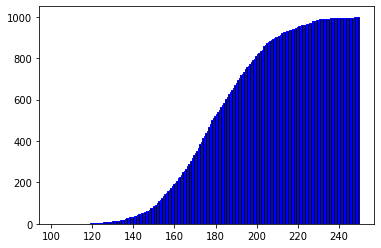

In [ ]:
#plt.hist(nums, bins=200,cumulative=True, edgecolor='b', facecolor='0');

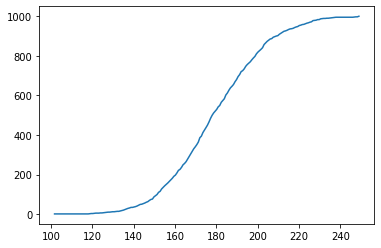

In [ ]:
import numpy as np
hist, bins = np.histogram(nums, bins=200)
plt.plot( bins[:-1], np.cumsum(hist) )

In [ ]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [ ]:
fixedCosts = 374000
costOfCapital = 0.15
investment = 120000

coffeePrice = 1
coffeeCM = 0.82
breakfastPrice = 2.2
breakfastCM = 0.80
snackPrice = 3.5
snackCM = 0.65
beveragePrice = 2
beverageCM = 0.70

def dailyCoffees():
  return random.normalvariate(500,90)

def dailyBreakfasts():
  return random.normalvariate(200,36)

def dailySnacks():
  return random.normalvariate(120,22)

def dailyBeverages():
  return random.normalvariate(180,32)

In [ ]:
def monte_carlo(n):
  results = 0
  dtickets = []
  drevenues = []
  doperatingIncome = []  
  tickets = []
  revenues = []
  operatingIncome = []
  totalTickets = 0
  totalRevenues = 0
  totalOperatingIncome = 0

  for i in range(n):
    
    coffees    = dailyCoffees()
    breakfasts = dailyBreakfasts()
    snacks     = dailySnacks()
    beverages  = dailyBeverages()
    
    dailyTickets = coffees + breakfasts + snacks + beverages
    dailyRevenue = coffees * coffeePrice + breakfasts * breakfastPrice + snacks * snackPrice + beverages * beveragePrice
    dailyIncome  = coffees * coffeePrice * coffeeCM + breakfasts * breakfastPrice * breakfastCM + snacks * snackPrice * snackCM + beverages * beveragePrice * beverageCM
    
    totalTickets = totalTickets + dailyTickets
    totalRevenues = totalRevenues + dailyRevenue
    totalOperatingIncome = totalOperatingIncome + dailyIncome

    #Calculating probability value
    probTickets = totalTickets / (i+1)
    probRevenues = totalRevenues / (i+1)
    probIncome = totalOperatingIncome / (i+1)

    #Append probability values to the list
    tickets.append(probTickets)
    revenues.append(probRevenues)
    operatingIncome.append(probIncome)

    dtickets.append(dailyTickets)
    drevenues.append(dailyRevenue)
    doperatingIncome.append(dailyIncome)

  #Plot the results
  plt.figure(figsize=[7,7])
  plt.xlabel("Iterations")
  plt.ylabel("Values")
  plt.axhline(y= (fixedCosts +  investment*costOfCapital )/openDays ,color='r', linestyle='-')
  plt.plot(tickets,label="Tickets")
  plt.plot(revenues,label="Revenues")
  plt.plot(operatingIncome,label="Operating Income")
  plt.plot(dtickets,'o',ms=0.2)
  plt.plot(drevenues,'o',ms=0.3)
  plt.plot(doperatingIncome,'o',ms=0.4)
  plt.legend()
  plt.show()

  plt.figure(figsize=[21,7])
  plt.subplot(1, 3, 1) # row 1, col 2 index 1
  plt.ylabel('Probability')
  plt.title('Histograms of Daily Tickets probabiltity')
  plt.hist(dtickets,100)
  
  plt.subplot(1, 3, 2) # row 1, col 2 index 1
  plt.ylabel('Probability')
  plt.title('Histograms of Daily revenues probabiltity')
  plt.hist(drevenues,100)

  plt.subplot(1, 3, 3) # row 1, col 2 index 3
  plt.ylabel('Probability')
  plt.title('Histograms of Daily operating income probabiltity')
  plt.hist(doperatingIncome,100)
  plt.show()

  return totalTickets, totalRevenues, totalOperatingIncome

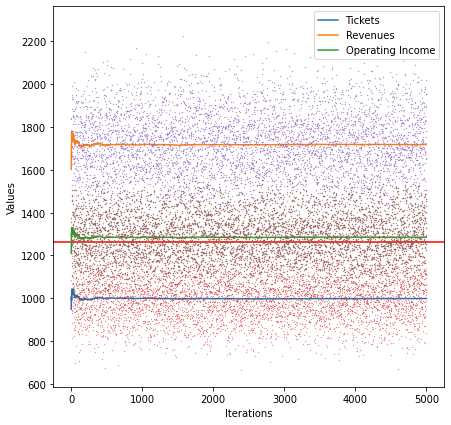

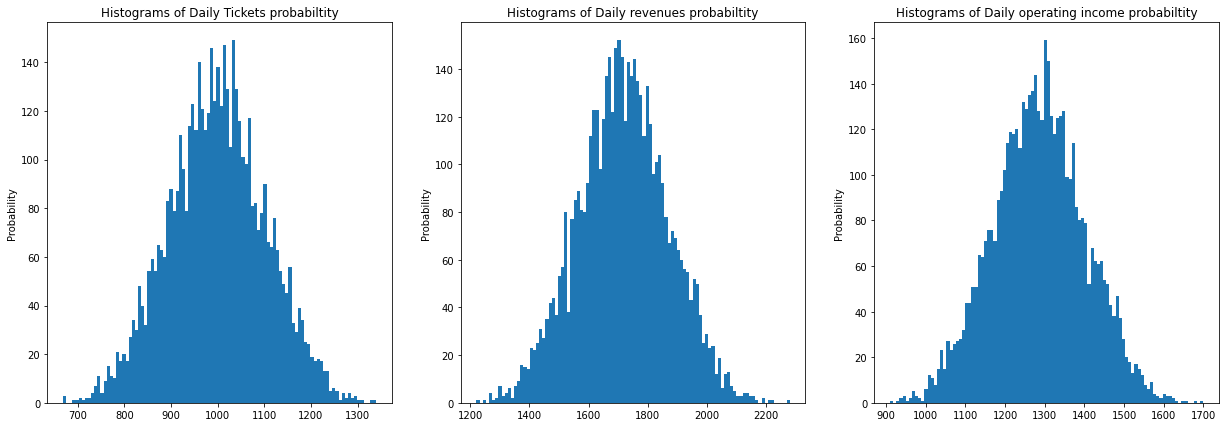

Investment      :  120000 €
Daily tickets   :  999.0 tickets
Revenues        :  532584.96 €
Operating Income:  398537.9 €
Fixed cost      :  374000 €
Net Income      :  24537.9 €
ROI             :  20.45 %


In [ ]:
simulationsDays = 5000
openDays = 310
answer = monte_carlo(simulationsDays)


dailyTickets = answer[0]/simulationsDays
yearlyRevenues = answer[1]/simulationsDays*310
yearlyOperatingIncome = answer[2]/simulationsDays*310
yearlyNetIncome = yearlyOperatingIncome - fixedCosts
roi = yearlyNetIncome / investment * 100

print("Investment      : ", round(investment,2),            "€")
print("Daily tickets   : ", round(dailyTickets,0),          "tickets")
print("Revenues        : ", round(yearlyRevenues,2),        "€")
print("Operating Income: ", round(yearlyOperatingIncome,2), "€")
print("Fixed cost      : ", round(fixedCosts,2),            "€")
print("Net Income      : ", round(yearlyNetIncome,2),       "€")
print("ROI             : ", round(roi,2),                   "%")